In [1]:
from IPython.display import Image

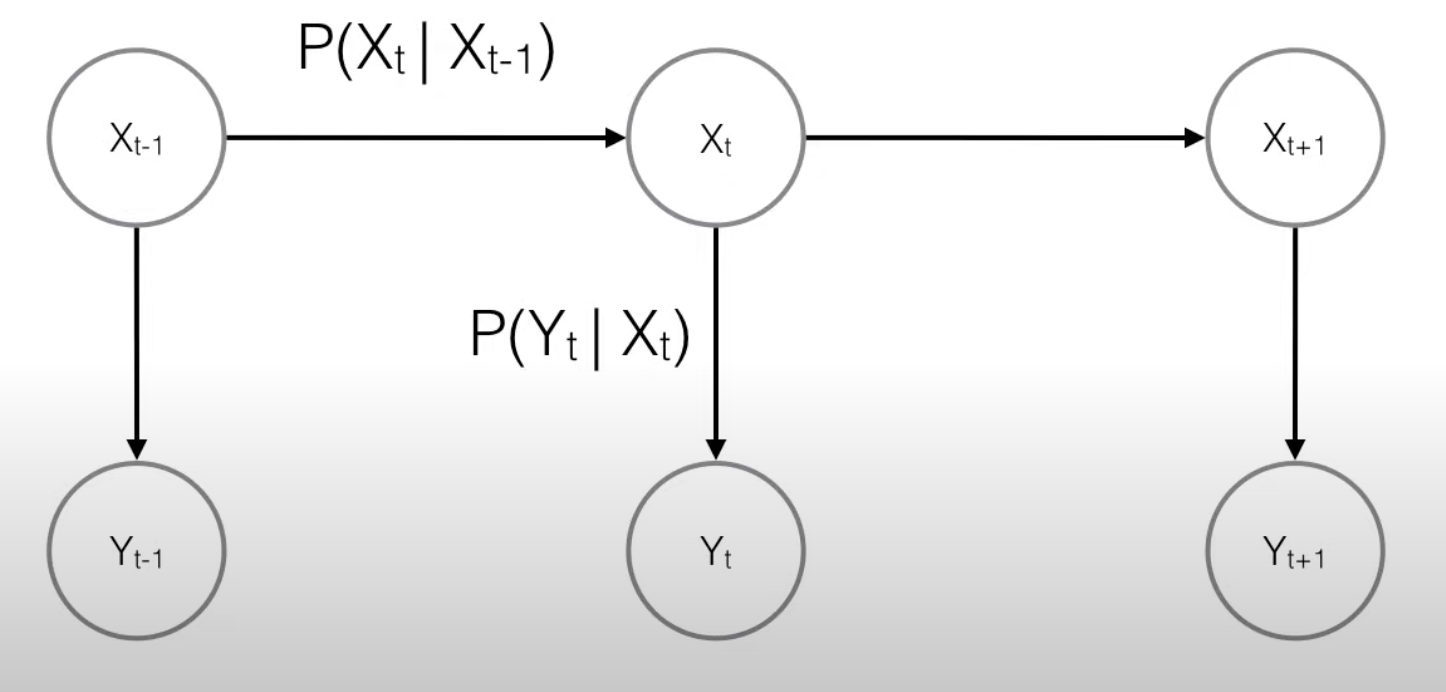

In [3]:
Image('../imgs/tracking.png', width=400)

如上图所示，已知 $P(X_t|X_{t-1})$（转移概率）和 $P(Y_t|X_t)$（观测概率），求 $P(X_t|Y_1,Y_2,\cdots,Y_t)$

$$
\begin{split}
P(X_t|Y_{1:t-1})&=\int_{dx_{t-1}}P(X_t,X_{t-1}|Y_{1:t-1})dx_{t-1}\\
&=\int_{dx_{t-1}}P(X_t|X_{t-1},Y_{1:t-1})P(X_{t-1}|Y_{1:t-1})dx_{t-1}\\
&=\int_{dx_{t-1}}P(X_t|X_{t-1})P(X_{t-1}|Y_{1:t-1})dx_{t-1}
\end{split}
$$

我们来看一些推论

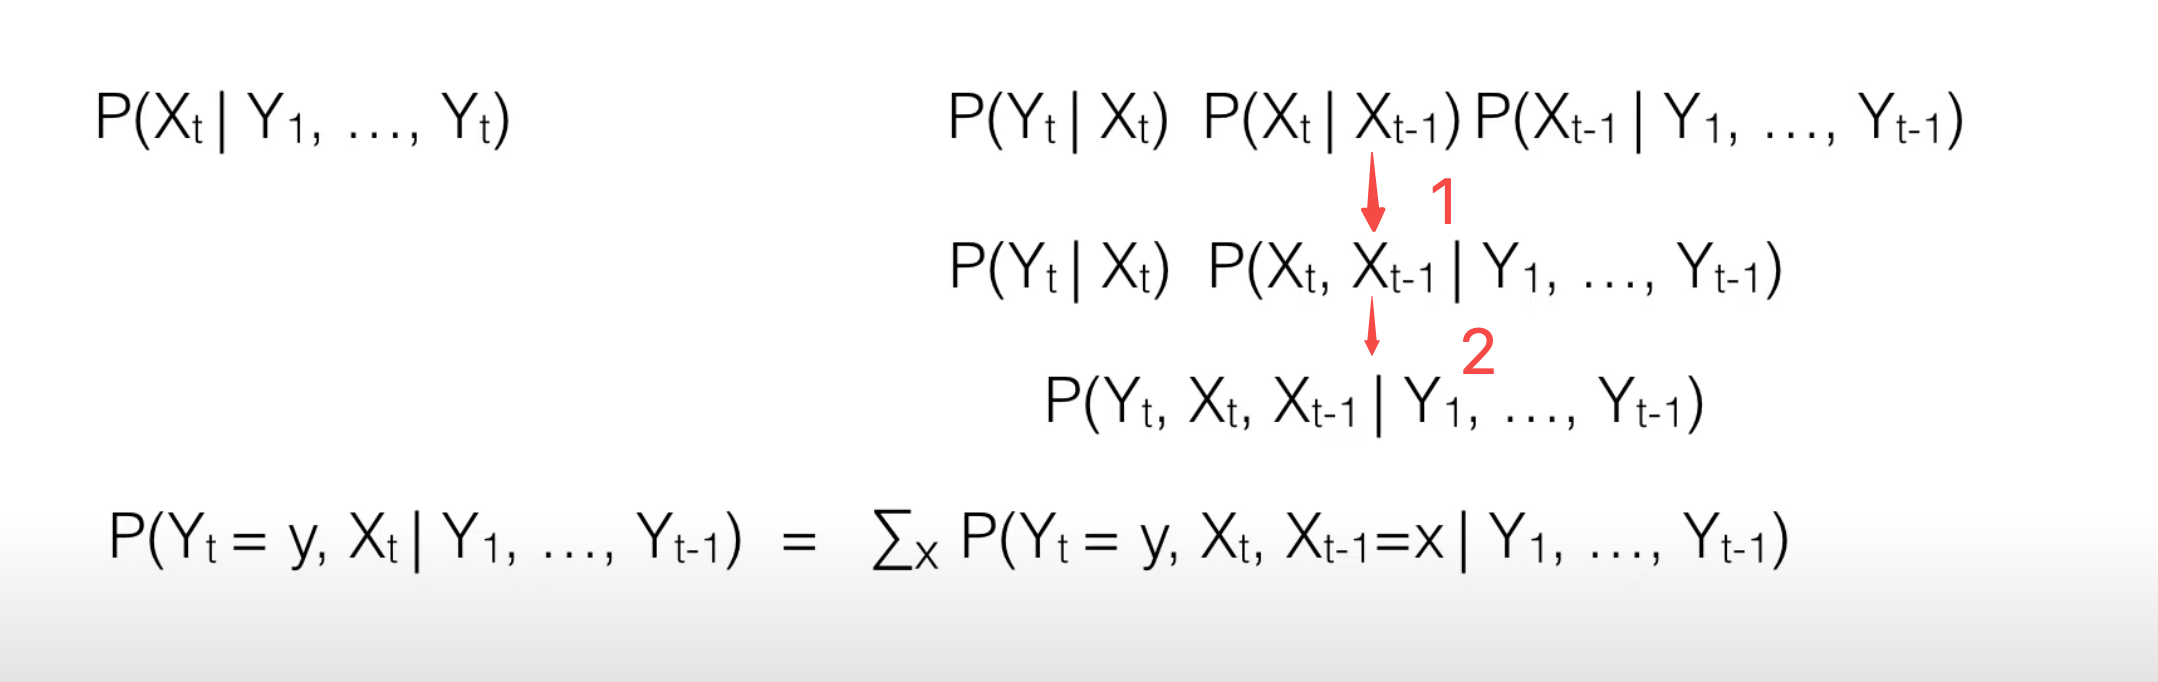

In [4]:
Image('../imgs/particle-filter-inference.png', width=400)

- 首先第一步
    - 我们反着推
    
$$
\begin{split}
P(X_t,X_{t-1}|Y_{1:t-1})&=P(X_t|X_{t-1},Y_{1:t-1})P(X_{t-1}|Y_{1:t-1})\\
&=P(X_t|X_{t-1})P(X_{t-1}|Y_{1:t-1})
\end{split}
$$

- 再来看第二步
    - 同样地反着推
    
$$
\begin{split}
P(Y_t,X_t,X_{t-1}|Y_{1:t-1})&=P(Y_t|X_t,X_{t-1},Y_{1:t-1})P(X_t,X_{t-1}|Y_{1:t-1})\\
&=P(Y_t|X_t)P(X_t,X_{t-1}|Y_{1:t-1})
\end{split}
$$


## 应用场景

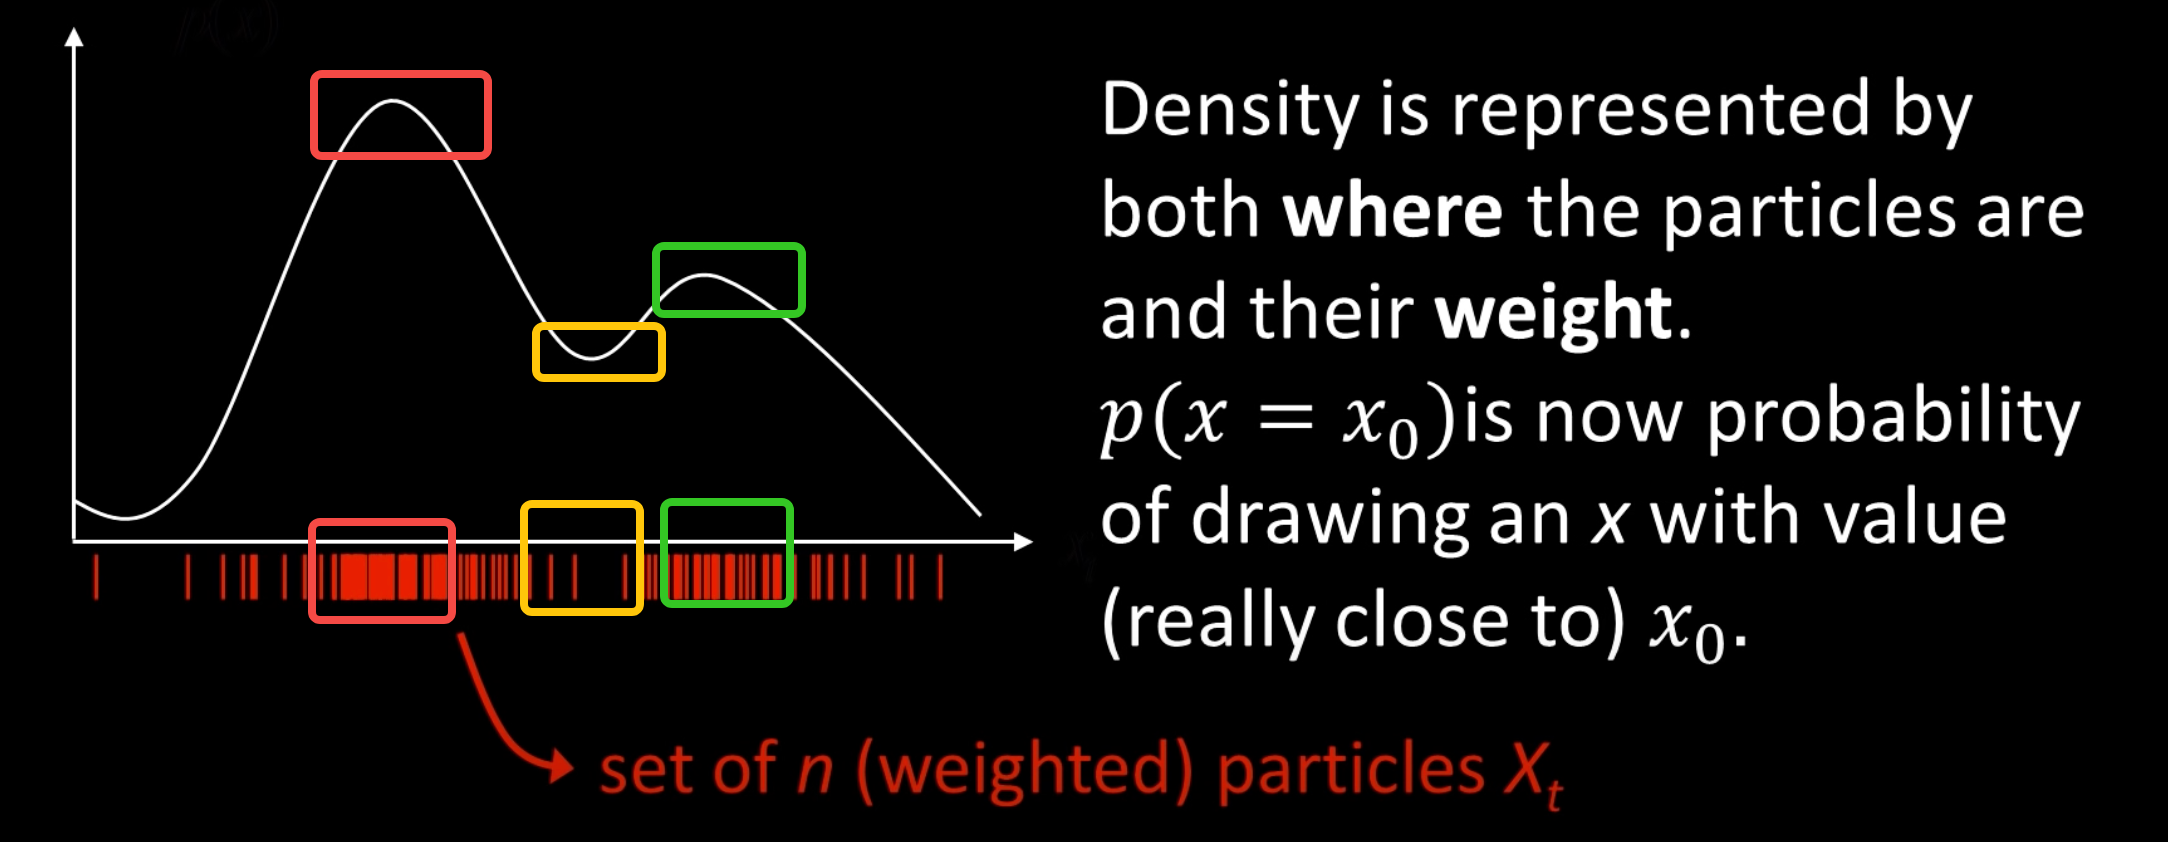

In [5]:
Image('../imgs/particles.png', width=400)

particle filtering 可以系统级解决如下的问题：

- There is something we want to know;
- We can measure something, related to what-we-want-to-know;
    - measure：maybe noisy
- We know something about the relationship between the measurements and what-we-want-to-know;

- particle(s)
    - 所谓的 particle(s) 粒子，就是随机采样的点，如果要估计的对象是 1 维，那么这些点，就是 1d 的；
    - 离散化采样；
- weight & resampling
    - 每个 particle 都会基于概率，会分配一个 weight；
    - 初始采样得到初始 particles，其中会有一些 particles 概率为0，resampling 技术会对 weight 显著的 particles 重新采样；